# Advanced Data Processing with Pandas

We have learned many useful Pandas functions in the previous tutorials. 

In this tutorial, we will apply everything we have learned to a more challenging data science problem. Instead of just using the dataset and assuming it is "correct", we will have to combine data from different sources and clean it up to make it useful for our analysis.

**The Task**
- We will expand our original IMDB dataset to include more movies, from a different `csv` file.
- We will have to analyse both data sources to find out how to combine them.
- We will explore our new dataset and find if there are any missing or duplicated values.

# Getting Started

Before we start using the new dataset, let's load the original one again and learn a few more functions that will be useful for our task.

In [ ]:
import pandas as pd

movies_df_original = pd.read_csv("datasets/IMDB-Movie-Data.csv")

In [ ]:
movies_df_original.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Finding Missing Values

In the previous tutorials, we noticed that some values in our dataset were NaN (Not a Number). This is a special value that Pandas uses to indicate that a value is missing.

We can systematically check for missing values in a DataFrame using the `isna()` function. This function returns a DataFrame of the same size as the original, but with boolean values. A value is `True` if the original value was NaN, and `False` otherwise.

Let's see how it works in practice.

In [ ]:
movies_df_original.isna()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


The function works on a row-level. We can aggregate the results to check which columns have missing values.

How do we aggregate the results?

### `any()`

The `any()` functions returns `True` if any (i.e., at least one) of the values in the row are `True`. 

In [ ]:
movies_df_original.isna().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

So we know that `Revenue (Millions)` and `Metascore` have missing values. But how many are missing in total?

### `sum()`

The `sum()` function returns the sum of all the values in a row. For boolean values, `True` is treated as `1` and `False` as `0`. So we can use `sum()` to count the number of `True` values in a row.

In [ ]:
movies_df_original.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

# Handling Missing Values

We have seen that there are missing values in our dataset. But how do we deal with them?

It is important to think about what a *missing value* means in the context of our dataset. For instance, if a Metascore is missing, it could mean that the movie was not rated by the Metacritic website.  If a Revenue value is missing, it could mean that the movie was not released yet or simply that the information is not available.

With that in mind, we have two main options to handle missing values: removing or filling them. 

The best one depends on the situation and on the dataset. 

### Option 1: Remove the rows with missing values

We can assume that if a value is missing, the entire row is not useful for our analysis. If we are analysing the average Metascore per genre and a movie does not have this value, it is not useful to consider it for this.

We can remove the rows with missing values using the `dropna()` function.

`dropna()` has a `how` parameter that can be set to `any` or `all`. The default value is `any`, which means that a row will be removed if any of its values are missing. If we set it to `all`, a row will be removed only if all of its values are missing.

Let's try it out and remove all the rows with any missing values.

In [ ]:
movies_df_original.dropna(how="any")

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


If we remove all rows with any missing values, we drop 162 rows. *How do we calculate this?*

We can also remove all rows with missing values in specific columns. For that, we can use the `subset` parameter and pass a list of column names.

Let's remove all rows with missing values in the `Revenue (Millions)` column.

In [ ]:
movies_df_original.dropna(subset=["Revenue (Millions)"], how="any")

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In this case, we drop 128 rows.

Remember that unless we set `inplace=True`, we are not modifying the original DataFrame. So we either need to assign the result to a new variable or set `inplace=True`.

### Option 2: Fill the missing values

Another option is to fill the missing values with some other value. This is useful if we want to keep all rows.

There are different ways to fill the missing values. We can fill them with a constant value, or we can fill them with the mean, median or mode of the column.

Again, the best option depends on the situation and on the dataset.

The `fillna()` function can be used to fill the missing values. It has a `value` parameter that can be set to a constant value, or to a function that will be applied to the column.

We can apply it directly to a specific column.

Let's fill the missing values in the `Metascore` column with the mean value.



In [ ]:
movies_df_original["Metascore"].fillna(movies_df_original["Metascore"].mean())

0      76.0
1      65.0
2      62.0
3      59.0
4      40.0
       ... 
995    45.0
996    46.0
997    50.0
998    22.0
999    11.0
Name: Metascore, Length: 1000, dtype: float64

#### Task: check the descriptive statistics of the `Metascore` column before and after filling the missing values. What happened?

Check it again after filling the missing values with 0.

In [ ]:
# Before filling in the missing values:
display(movies_df_original["Metascore"].describe())
# After filling with the mean:
display(movies_df_original["Metascore"].fillna(movies_df_original["Metascore"].mean()).describe())
# After filling with 0s:
display(movies_df_original["Metascore"].fillna(0).describe())

count    936.000000
mean      58.985043
std       17.194757
min       11.000000
25%       47.000000
50%       59.500000
75%       72.000000
max      100.000000
Name: Metascore, dtype: float64

count    1000.000000
mean       58.985043
std        16.634858
min        11.000000
25%        47.750000
50%        58.985043
75%        71.000000
max       100.000000
Name: Metascore, dtype: float64

count    1000.000000
mean       55.210000
std        22.030598
min         0.000000
25%        43.000000
50%        58.000000
75%        71.000000
max       100.000000
Name: Metascore, dtype: float64

#### Task: do the same for the `Revenue (Millions)` column.

In [ ]:
# Before filling in the missing values:
display(movies_df_original["Revenue (Millions)"].describe())
# After filling with the mean:
display(movies_df_original["Revenue (Millions)"].fillna(movies_df_original["Revenue (Millions)"].mean()).describe())
# After filling with 0s:
display(movies_df_original["Revenue (Millions)"].fillna(0).describe())

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

count    1000.000000
mean       82.956376
std        96.412043
min         0.000000
25%        17.442500
50%        60.375000
75%        99.177500
max       936.630000
Name: Revenue (Millions), dtype: float64

count    1000.000000
mean       72.337960
std       100.320314
min         0.000000
25%         3.352500
50%        37.145000
75%        99.177500
max       936.630000
Name: Revenue (Millions), dtype: float64

You can also apply `fillna()` to the entire DataFrame. In this case, the function will fill the missing values in all columns.

You should be careful when using this option, because it will fill all missing values, even if they are not supposed to be filled. For instance, if we fill the missing values in the `Genre` column, we will replace the missing values with the mean value of the column, which is not correct.

# Handling Duplicate Values

We can also check if there are duplicate values in our dataset. Duplicate values are rows that have the same values in all (or a subset of) columns.

If different rows have the exact same values in all columns, it is safe to assume they are duplicates. But if different rows have the same values in some columns, it is not clear if they are duplicates or not. For instance, if two movies have the same title, they could still be different. However, in our dataset, this is very unlikely.

To check for duplicate values, we can use the `duplicated()` function. This function returns a Series of boolean values, with one value for each row. A value is `True` if the row is a duplicate, and `False` otherwise. It works very similarly to `isna()`.

Let's check if there are any duplicate values in our dataset.

In [ ]:
movies_df_original.duplicated().sum()

0

There are no duplicate values in our dataset. But let's test it for one column just to see how it works.

Let's check if there are any duplicate (Director, Year) pairs.

In [ ]:
movies_df_original.duplicated(subset=["Director", "Year"]).sum()

13

That means 13 rows have the same Director and Year as another row. Of course they are not duplicates, because they are different movies, so we don't need to remove them.

But in case we wanted to remove them, we could use the `drop_duplicates()` function.

It works very similarly to `dropna()`. We can use the `subset` parameter to specify which columns to consider when checking for duplicates.

If we had duplicates in our dataset, we could remove them like this:

In [ ]:
movies_df_original.drop_duplicates(subset=["Director", "Year"], keep="first")

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


The `keep` parameter can be set to `first` or `last`. If we set it to `first`, the first row will be kept and the rest will be removed. If we set it to `last`, the last row will be kept and the rest will be removed.

# Combining Datasets

It's time to use our new dataset! Let's first load it and take a look at it.

In [ ]:
movies_df_new = pd.read_csv("datasets/imdb_5k.csv")
movies_df_new.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


The columns are completely different! So we can't just combine the two datasets. We need to decide which columns to keep and which to remove.
Now it's time to work as real data scientist and investigate the data carefully.

#### Task: have a look at the columns in the new dataset and figure out what they mean.

In [ ]:
print(movies_df_original.columns)
print(movies_df_new.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


### Task: select at least 5 columns that are present in both datasets.

In [ ]:
rename_mapping = {"movie_title": "Title", "title_year": "Year", "director_name": "Director", "imdb_score": "Rating", "gross": "Revenue (Millions)", "genres": "Genre", "duration": "Runtime (Minutes)"}

## Concatenating Datasets

If we want to simply add one dataset to the other, we can use the `concat()` function.

In this case, Pandas will just add the rows of the second dataset to the end of the first one.

Let's see how the output looks like.

In [ ]:
movies_df_combined = pd.concat([movies_df_original, movies_df_new])
movies_df_combined.tail(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84.0
5039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000.0
5040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16.0
5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660.0
5042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0


That doesn't look good... Since the columns don't match, Pandas added a lot of missing values.

Let's do two things:
- Decide which columns to keep and rename them to a common name (using the `rename()` function
- Concatenate the two datasets again

In [ ]:
# Columns from the original dataframe. Let's keep using these names and rename the corresponding columns in the new dataframe.
columns_to_keep = ["Title", "Year", "Director", "Rating", "Revenue (Millions)"]
rename_mapping = {"movie_title": "Title", "title_year": "Year", "director_name": "Director", "imdb_score": "Rating", "gross": "Revenue (Millions)"}
# Now let's rename the columns in the new dataframe.
movies_df_new.rename(columns=rename_mapping, inplace=True)
# Now let's concatenate the dataframes using only the columns we want to keep.
movies_df_combined = pd.concat([movies_df_original[columns_to_keep], movies_df_new[columns_to_keep]])
movies_df_combined.tail(5)

,Title,Year,Director,Rating,Revenue (Millions)
5038,Signed Sealed Delivered,2013.0,Scott Smith,7.7,NaN
5039,The Following,NaN,NaN,7.5,NaN
5040,A Plague So Pleasant,2013.0,Benjamin Roberds,6.3,NaN
5041,Shanghai Calling,2012.0,Daniel Hsia,6.3,10443.0
5042,My Date with Drew,2004.0,Jon Gunn,6.6,85222.0


It looks much better now!

However, we might have added some duplicate rows. The new dataset might have movies that are already in the old dataset.

#### Task: check if there are any duplicate rows in the new dataset and remove them.

In [ ]:
print(movies_df_combined.duplicated().sum())
movies_df_combined.drop_duplicates(inplace=True)
print(movies_df_combined.duplicated().sum())

123
0


This was not the only problem...

#### Task: investigate the combined dataset and figure out at least three other issues we need to fix.

**Hint:** have a look at the index.

### Fixing potential issues

We will do three things:
- Fix the index
- Fix the column types
- Handle missing values

#### Fixing the index

The index is not correct. It should be unique for each row, but it is not. We can fix it by resetting it.

The `reset_index()` function will reset the index and create a new column with the old index values, in case we need to use them later.

In [ ]:
movies_df_combined.reset_index(inplace=True)
movies_df_combined.tail(5)

,index,Title,Year,Director,Rating,Revenue (Millions)
5915,5038,Signed Sealed Delivered,2013.0,Scott Smith,7.7,NaN
5916,5039,The Following,NaN,NaN,7.5,NaN
5917,5040,A Plague So Pleasant,2013.0,Benjamin Roberds,6.3,NaN
5918,5041,Shanghai Calling,2012.0,Daniel Hsia,6.3,10443.0
5919,5042,My Date with Drew,2004.0,Jon Gunn,6.6,85222.0


#### Fixing the column types

In our original dataset, the `Year` column was an integer. But in the new dataset, it is a float. When we concatenated the two datasets, Pandas converted the column to a float.

However, it makes more sense to keep it as an integer. We can convert it using the `astype()` function.

In [ ]:
movies_df_combined["Year"] = movies_df_combined["Year"].astype(int)
movies_df_combined.head(5)

That didn't work... Why?

Some years are missing, and we can't convert NaN to an integer.

We need first handle the missing values. Then we come back to this.

#### Handling missing values

We already saw that the missing values in the `Year` column are not a critical. In this case, it makes sense to remove them.

Let's do that.

In [ ]:
movies_df_combined.dropna(subset=["Year"], how="any", inplace=True)

Now let's try to convert the column to an integer again.

In [ ]:
movies_df_combined["Year"] = movies_df_combined["Year"].astype(int)
movies_df_combined.head(5)

,index,Title,Year,Director,Rating,Revenue (Millions)
0,0,Guardians of the Galaxy,2014,James Gunn,8.1,333.13
1,1,Prometheus,2012,Ridley Scott,7.0,126.46
2,2,Split,2016,M. Night Shyamalan,7.3,138.12
3,3,Sing,2016,Christophe Lourdelet,7.2,270.32
4,4,Suicide Squad,2016,David Ayer,6.2,325.02


Now it works!

#### Task: check what other columns have missing values and decide what to do with them.

In [ ]:
movies_df_combined

Now we have a nice combined dataset!

Time to answer the quiz.

# !!! QUIZ !!!

# Adding more Information

There are more columns that are present in both datasets. Let's add at least genre and runtime.

#### Task: map the genre and runtime columns from the old dataset to the new one. 

Use the same approach as before and rename the columns to a common name.

#### Task: create a new combined dataset including the seven columns we selected.

In [ ]:
# Columns from the original dataframe. Let's keep using these names and rename the corresponding columns in the new dataframe.
columns_to_keep = ["Title", "Year", "Director", "Rating", "Revenue (Millions)", "Genre", "Runtime (Minutes)"]
rename_mapping = {"movie_title": "Title", "title_year": "Year", "director_name": "Director", "imdb_score": "Rating", "gross": "Revenue (Millions)", "genres": "Genre", "duration": "Runtime (Minutes)"}
# Now let's rename the columns in the new dataframe.
movies_df_new.rename(columns=rename_mapping, inplace=True)
# Now let's concatenate the dataframes using only the columns we want to keep.
movies_df_combined = pd.concat([movies_df_original[columns_to_keep], movies_df_new[columns_to_keep]])
movies_df_combined.tail(5)

,Title,Year,Director,Rating,Revenue (Millions),Genre,Runtime (Minutes)
5038,Signed Sealed Delivered,2013.0,Scott Smith,7.7,NaN,Comedy|Drama,87.0
5039,The Following,NaN,NaN,7.5,NaN,Crime|Drama|Mystery|Thriller,43.0
5040,A Plague So Pleasant,2013.0,Benjamin Roberds,6.3,NaN,Drama|Horror|Thriller,76.0
5041,Shanghai Calling,2012.0,Daniel Hsia,6.3,10443.0,Comedy|Drama|Romance,100.0
5042,My Date with Drew,2004.0,Jon Gunn,6.6,85222.0,Documentary,90.0


#### Task: Fix the index and the runtime colum (the values should be integers).

In [ ]:
movies_df_combined.reset_index(inplace=True)
movies_df_combined.dropna(subset=["Year"], how="any", inplace=True)
movies_df_combined.dropna(subset=["Runtime (Minutes)"], how="any", inplace=True)
movies_df_combined["Runtime (Minutes)"] = movies_df_combined["Runtime (Minutes)"].astype(int)
movies_df_combined.tail(5)

,index,Title,Year,Director,Rating,Revenue (Millions),Genre,Runtime (Minutes)
6037,5037,Newlyweds,2011.0,Edward Burns,6.4,4584.0,Comedy|Drama,95
6038,5038,Signed Sealed Delivered,2013.0,Scott Smith,7.7,NaN,Comedy|Drama,87
6040,5040,A Plague So Pleasant,2013.0,Benjamin Roberds,6.3,NaN,Drama|Horror|Thriller,76
6041,5041,Shanghai Calling,2012.0,Daniel Hsia,6.3,10443.0,Comedy|Drama|Romance,100
6042,5042,My Date with Drew,2004.0,Jon Gunn,6.6,85222.0,Documentary,90


#### Task: fix the genre column. The values should be separated by commas.

In [ ]:
movies_df_combined["Genre"] = movies_df_combined["Genre"].str.replace("|", ",")
movies_df_combined.tail(5)

<ipython-input-34-e76020626592>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies_df_combined["Genre"] = movies_df_combined["Genre"].str.replace("|", ",")


,index,Title,Year,Director,Rating,Revenue (Millions),Genre,Runtime (Minutes)
6037,5037,Newlyweds,2011.0,Edward Burns,6.4,4584.0,"Comedy,Drama",95
6038,5038,Signed Sealed Delivered,2013.0,Scott Smith,7.7,NaN,"Comedy,Drama",87
6040,5040,A Plague So Pleasant,2013.0,Benjamin Roberds,6.3,NaN,"Drama,Horror,Thriller",76
6041,5041,Shanghai Calling,2012.0,Daniel Hsia,6.3,10443.0,"Comedy,Drama,Romance",100
6042,5042,My Date with Drew,2004.0,Jon Gunn,6.6,85222.0,Documentary,90


# Bonus Tasks

Using the most recent dataset, answer the following questions:

### Find out which directors were included in the combined dataset.

What is their average IMDB rating?

In [ ]:
movies_df_new

In [ ]:
new_directors = movies_df_combined.query("Director.isin(@movies_df_new.Director) and not Director.isin(@movies_df_original.Director)").Director
display(new_directors.head(5))
display(movies_df_combined.query("Director in @new_directors")["Rating"].mean())

1016    Andrew Adamson
1055        Peter Sohn
1064    Andrew Adamson
1074       Tom Shadyac
1076    Kevin Reynolds
Name: Director, dtype: object

6.214556555269923

### What is the average runtime of movies released in the last 10 years?

In [ ]:
movies_df_combined.query("Year > 2012")["Runtime (Minutes)"].mean()

108.77972027972028

### Are movies getting shorter? Plot the average runtime of movies released in each year.

<AxesSubplot:xlabel='Year'>

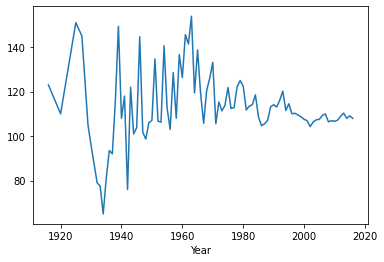

In [ ]:
movies_df_combined.groupby("Year")["Runtime (Minutes)"].mean().plot()

### Compare the median runtime of Documentaries and Comedy movies.

In [ ]:
display(movies_df_combined.query("Genre == 'Documentary'")["Runtime (Minutes)"].median())
display(movies_df_combined.query("Genre == 'Comedy'")["Runtime (Minutes)"].median())

92.0

94.0

### Which director directed the most movies with different genres?

In [ ]:
movies_df_combined.groupby("Director")["Genre"].nunique().sort_values(ascending=False).head(5)

Director
Steven Spielberg    22
Martin Scorsese     21
Clint Eastwood      19
Ridley Scott        16
Spike Lee           16
Name: Genre, dtype: int64

### What year had the highest average IMDB rating? And the lowest?

In [ ]:
display(movies_df_combined.groupby("Year")["Rating"].mean().sort_values(ascending=False).head(1))
display(movies_df_combined.groupby("Year")["Rating"].mean().sort_values(ascending=False).tail(1))

Year
1957.0    8.55
Name: Rating, dtype: float64

Year
1920.0    4.8
Name: Rating, dtype: float64